In [14]:
import pandas as pd
from sentinel2py.downloader.manager import Sentinel2Manager
from sentinel2py.plot.plotter import SentinelPlotter

# Initialize manager and plotter
manager = Sentinel2Manager(out_dir="./data")
plotter = SentinelPlotter()

# Define your area and dates
bbox = [7.0, 45.9, 7.1, 46.0]  # [min_lon, min_lat, max_lon, max_lat]
start, end = "2025-01-01", "2025-01-30"

In [2]:
# Get 1 least cloudy tile
tiles = manager.get_least_cloudy_tiles(bbox, start, end, n_tiles=1)
tile = tiles[0]
print(tiles)
print(tile)

C:\Users\capiz\anaconda3\envs\test\Lib\site-packages\pystac_client\item_search.py:925: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


[<Item id=S2B_MSIL2A_20250113T103309_R108_T32TLR_20250113T124201>]
<Item id=S2B_MSIL2A_20250113T103309_R108_T32TLR_20250113T124201>


In [3]:
# Download and stack RGB
downloaded, stacked = manager.download_bands(tile, preset="RGBNIR", stack=True)
stack_path = list(stacked.values())[0]

[INFO] Downloading 4 bands → ./data\S2B_MSIL2A_20250113T103309_R108_T32TLR_20250113T124201


[SKIP] Already exists → ./data\S2B_MSIL2A_20250113T103309_R108_T32TLR_20250113T124201\B02_B03_B04_B08_20250113_T32TLR_10m_stack.tif


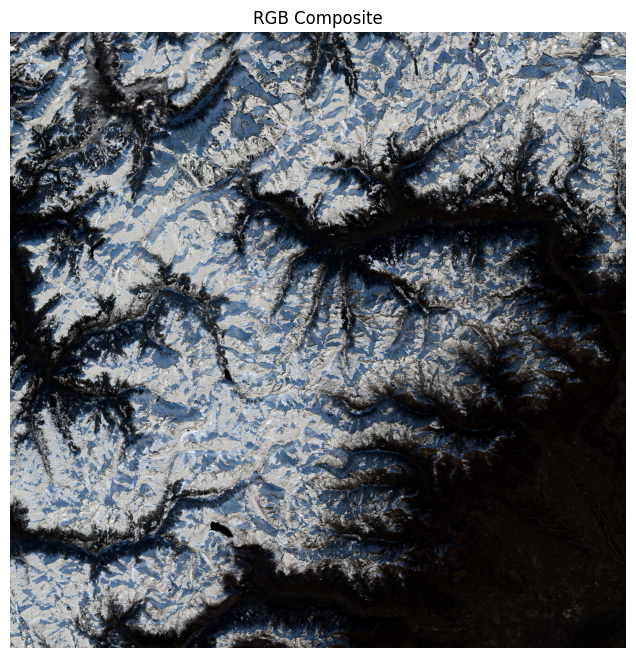

In [35]:
plotter.plot_rgb(stack_path, bands=(3,2,1), downsample=4, stretch=True, gamma=1, equalize=False)

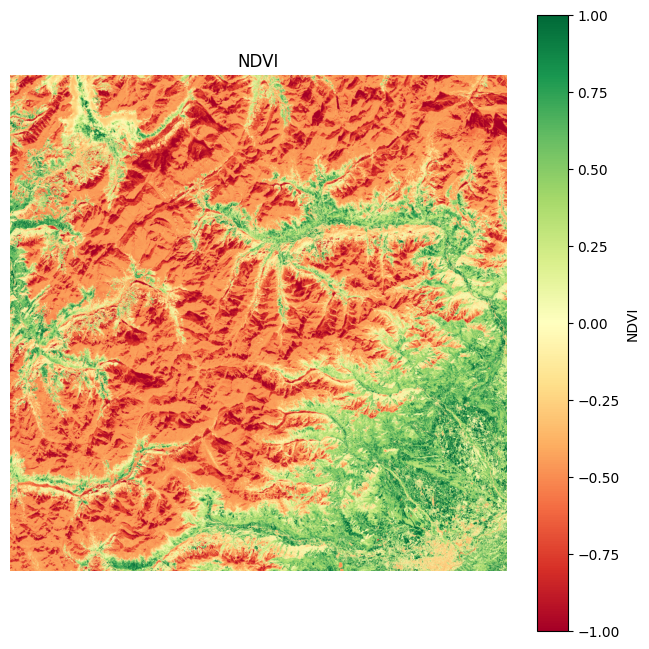

In [10]:
plotter.plot_ndvi(stack_path, bands=(4,3), downsample=4, stretch=True, gamma=1, equalize=False, normalize=False)

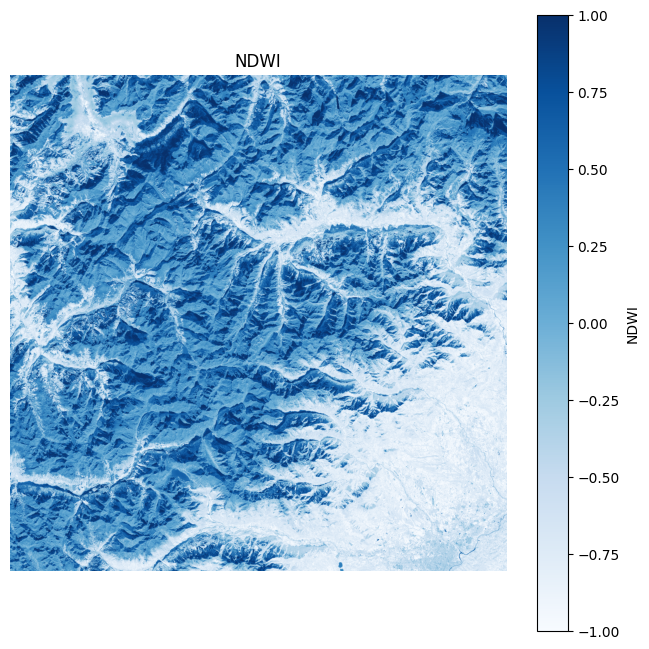

In [6]:
plotter.plot_ndwi(stack_path, bands=(2,4), downsample=4, stretch=False, gamma=1, equalize=True, normalize=False)

In [19]:
# Define your area and period
bbox = [7.0, 45.9, 7.1, 46.0]  # [min_lon, min_lat, max_lon, max_lat]
start, end = "2025-06-01", "2025-06-30"

# Get N least-cloudy tiles
tiles = manager.get_least_cloudy_tiles(bbox=bbox, start=start, end=end, max_cloud=20, limit=50, n_tiles=2)

# Build a pandas DataFrame
df = pd.DataFrame([{
    "Tile ID": tile.id.split("_")[-2],
    "Full ID": tile.id,
    "Date": tile.properties.get("datetime", "").split("T")[0],
    "Cloud Cover (%)": tile.properties.get("eo:cloud_cover", "N/A"),
    "Sensing Time": tile.properties.get("sentinel:product_start_time", "N/A")
} for tile in tiles])

# Sort by cloud cover
df = df.sort_values("Cloud Cover (%)").reset_index(drop=True)

# Display nicely
df

C:\Users\capiz\anaconda3\envs\test\Lib\site-packages\pystac_client\item_search.py:925: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


,Tile ID,Full ID,Date,Cloud Cover (%),Sensing Time
0,T31TGM,S2A_MSIL2A_20250629T102701_R108_T31TGM_2025062...,2025-06-29,0.072810,N/A
1,T32TLS,S2A_MSIL2A_20250609T102701_R108_T32TLS_2025060...,2025-06-09,0.225361,N/A


In [20]:
tiles

[<Item id=S2A_MSIL2A_20250629T102701_R108_T31TGM_20250629T143707>,
 <Item id=S2A_MSIL2A_20250609T102701_R108_T32TLS_20250609T143435>]

In [21]:
all_downloaded, all_stacked = manager.download_multiple_tiles(
    tiles,
    preset="RGB",      # or any preset from BAND_PRESETS
    stack=True,        # create stacked GeoTIFFs
    target_res="highest", # or specify resolution like 10
    overwrite=False)



[1/2] Tile T31TGM  (cloud=0.07281%)
[INFO] Downloading 3 bands → ./data\S2A_MSIL2A_20250629T102701_R108_T31TGM_20250629T143707


📦 Writing stack:   0%|          | 0/3 [00:00<?, ?band/s]


[2/2] Tile T32TLS  (cloud=0.225361%)
[INFO] Downloading 3 bands → ./data\S2A_MSIL2A_20250609T102701_R108_T32TLS_20250609T143435


📥 B02:   0%|                                                                               | 0.00/270M [00:00<…

📥 B03:   0%|                                                                               | 0.00/276M [00:00<…

📥 B04:   0%|                                                                               | 0.00/272M [00:00<…

📦 Writing stack:   0%|          | 0/3 [00:00<?, ?band/s]

In [24]:
all_stacked

{'S2A_MSIL2A_20250629T102701_R108_T31TGM_20250629T143707': {10: './data\\S2A_MSIL2A_20250629T102701_R108_T31TGM_20250629T143707\\B02_B03_B04_20250629_T31TGM_10m_stack.tif'},
 'S2A_MSIL2A_20250609T102701_R108_T32TLS_20250609T143435': {10: './data\\S2A_MSIL2A_20250609T102701_R108_T32TLS_20250609T143435\\B02_B03_B04_20250609_T32TLS_10m_stack.tif'}}

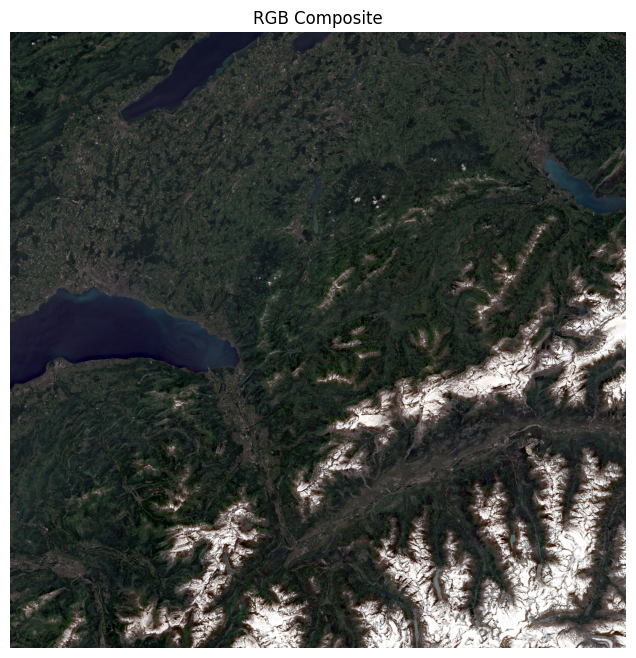

In [39]:
# Helper function to get stacked file path by tile index
def get_stack_file(all_stacked, n=0):
    try:
        key = list(all_stacked.keys())[n]
        return next(iter(all_stacked[key].values()))
    except IndexError:
        raise ValueError(f"No tile at index {n}")
    except StopIteration:
        raise ValueError(f"No stacked files found for tile {key}")


# Get 2nd tile (index 1)
stack_file = get_stack_file(all_stacked, n=1)


plotter.plot_rgb(stack_file, bands=(3,2,1), downsample=4, stretch=True, gamma=, equalize=False)